In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df=pd.read_csv("SampleSuperstore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
pd.isnull(df).sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.drop(columns="Postal Code", inplace=True)

In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["State"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['South' 'West' 'Central' 'East']


<Axes: xlabel='Region'>

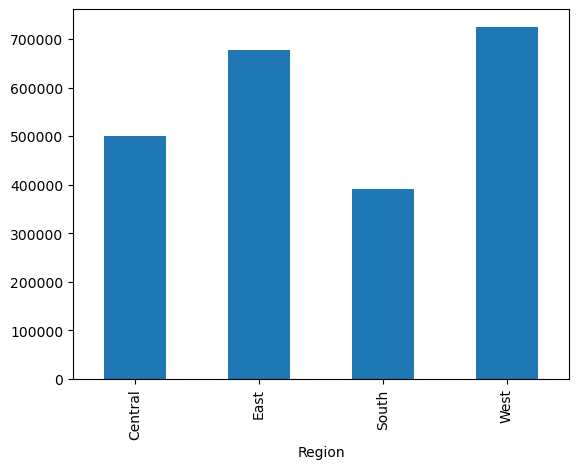

In [10]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

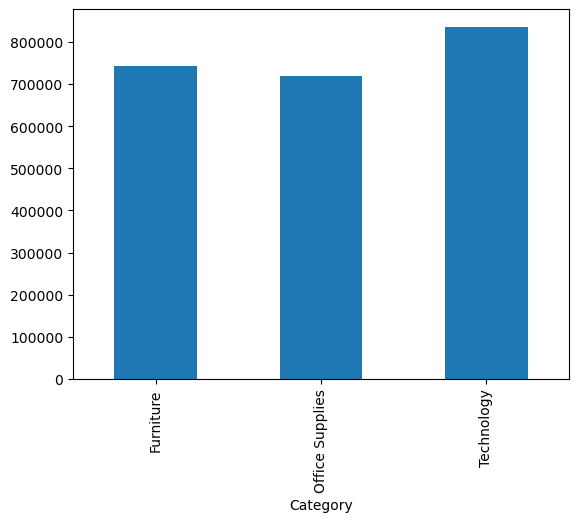

In [11]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: ylabel='Profit'>

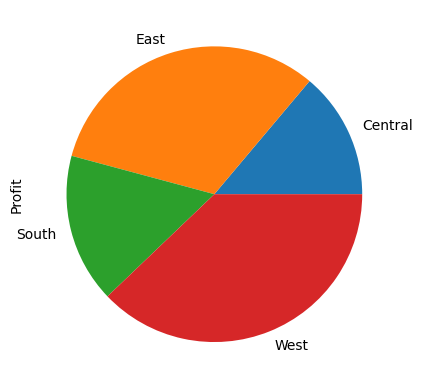

In [12]:
df.groupby("Region")["Profit"].sum().plot.pie()

<Axes: ylabel='Profit'>

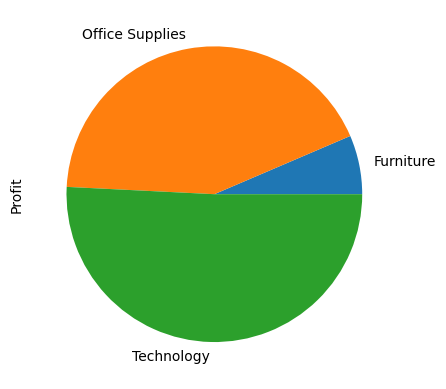

In [13]:
df.groupby("Category")["Profit"].sum().plot.pie()

<Axes: xlabel='Discount'>

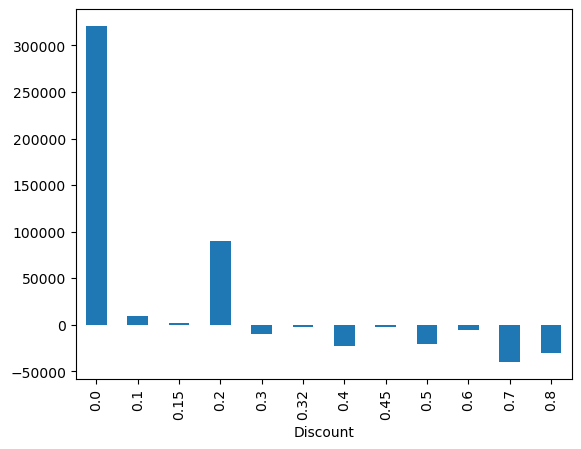

In [14]:
df.groupby("Discount")["Profit"].sum().plot.bar()

<Axes: ylabel='Profit'>

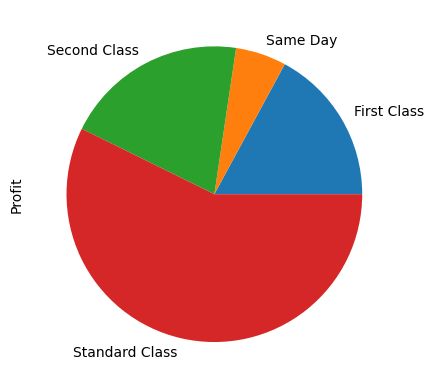

In [15]:
df.groupby("Ship Mode")["Profit"].sum().plot.pie()

<Axes: xlabel='Sub-Category'>

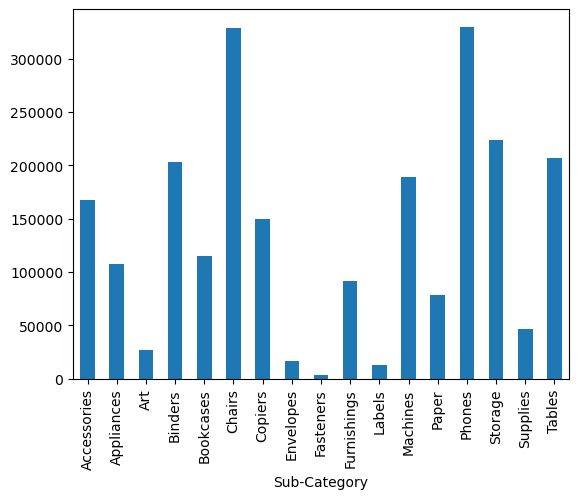

In [16]:
df.groupby("Sub-Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

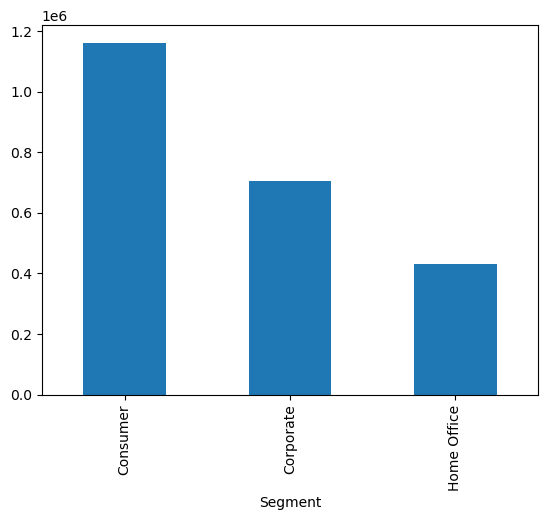

In [17]:
df.groupby("Segment")["Sales"].sum().plot.bar()

In [18]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [34]:

import geopandas as gpd
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
shapefile = 'ne_10m_geography_regions_polys.shp'
gdf = gpd.read_file(shapefile)
print(gdf.head())
merged_data = gdf.merge(sales_by_city, left_on='Name', right_on='City', how='left')
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Sales', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Sales by City', fontsize=16)
plt.axis('off')
plt.show()


  FEATURECLA       NAME NAMEALT         REGION  SUBREGION  MIN_LABEL  \
0     Island  Pentecost     NaN        Oceania  Melanesia        6.7   
1     Island     Anatom     NaN        Oceania  Melanesia        6.7   
2     Island       Gaua     NaN        Oceania  Melanesia        6.7   
3     Island   Vanikolo     NaN        Oceania  Melanesia        6.7   
4     Island       Adak     NaN  North America        NaN        6.7   

   MAX_LABEL  SCALERANK         LABEL WIKIDATAID  ...     NAME_TR  \
0       12.0          7  Pentecost I.    Q960808  ...   Pentecost   
1       12.0          7        Anatom    Q528884  ...      Anatom   
2       12.0          7          Gaua    Q583383  ...        Gaua   
3       12.0          7      Vanikolo   Q1536424  ...    Vanikolo   
4       12.0          7       Adak I.    Q176381  ...  Adak Adası   

         NAME_VI NAME_ZH       NE_ID   NAME_FA      NAME_HE    NAME_UK  \
0  Đảo Pentecost  彭特科斯特岛  1159102327   پنتکوست  האי פנטקוסט  Пентекост   
1   

KeyError: 'Name'